In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import zipfile
import urllib.request

In [16]:
driver = webdriver.Chrome() #cargo la págica a scrapear
driver.get('https://datawrapper.dwcdn.net/LG7ud/3/')

In [17]:
table = driver.find_element(By.XPATH, '//*[@id="chart"]/div/table') #localizo la tabla a partir de la expresion XPATH

In [18]:
data = [] # creo una lista vacía
for row in table.find_elements(By.TAG_NAME, 'tr'): #itero los elementos 'tr' de la tabla
    row_data = [cell.text for cell in row.find_elements(By.TAG_NAME, 'td')] #por cada 'tr' encuentra los 'td' y almacena el texto que contienen en row_data
    data.append(row_data) #añádelos a la lista data

In [19]:
df = pd.DataFrame(data) # creo un dataframe con el contenido de la lista data

In [20]:
df

,0,1,2,3,4
0,None,None,None,None,None
1,6.000€,45€,43€,3€,"0,2€"
2,12.000€,585€,553€,33€,"2,7€"
3,18.000€,1.253€,1.191€,63€,"5,2€"
4,24.000€,2.051€,1.959€,93€,"7,7€"
5,30.000€,2.849€,2.727€,123€,"10,2€"
6,36.000€,3.785€,3.632€,153€,"12,7€"
7,42.000€,4.859€,4.676€,183€,"15,2€"
8,48.000€,5.933€,5.720€,213€,"17,7€"
9,54.000€,7.025€,6.783€,243€,"20,2€"


In [21]:
df = df.drop(0) #elimino la primera fila

In [22]:
nombres_columnas = ['Base liquidable anual en €', 'Cuota autonómica en €', 'Cuota con medio punto en €', 'Ahorro anual en €', 'Ahorro al mes en €']
df.columns = nombres_columnas #cambio el nombre de las columnas

In [23]:
df = df.apply(lambda x: x.str.replace('.', '').str.replace('€', '')) #elimino del dataframe los puntos y los simbolos €

/var/folders/c4/q4g9gfss40b99pgtrgdmszbh0000gn/T/ipykernel_2842/1660699103.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df = df.apply(lambda x: x.str.replace('.', '').str.replace('€', '')) #elimino del dataframe los puntos y los simbolos €


In [24]:
a_int = ["Base liquidable anual en €", "Cuota autonómica en €", "Cuota con medio punto en €", "Ahorro anual en €"]
df[a_int] = df[a_int].astype(int) #transformo en int los valores de las columnas

In [25]:
df

,Base liquidable anual en €,Cuota autonómica en €,Cuota con medio punto en €,Ahorro anual en €,Ahorro al mes en €
1,6000,45,43,3,"0,2"
2,12000,585,553,33,"2,7"
3,18000,1253,1191,63,"5,2"
4,24000,2051,1959,93,"7,7"
5,30000,2849,2727,123,"10,2"
6,36000,3785,3632,153,"12,7"
7,42000,4859,4676,183,"15,2"
8,48000,5933,5720,213,"17,7"
9,54000,7025,6783,243,"20,2"
10,60000,8285,8013,273,"22,7"


In [26]:
ahorro_anual = df.set_index('Base liquidable anual en €')['Ahorro anual en €'].rename('Ahorro anual en €')
ahorro_anual = pd.DataFrame(ahorro_anual) #creo un data frame llamado ahorro anual con los datos que me interesa visualizar

In [28]:
ahorro_anual.to_excel('ahorro_anual.cvs', index=True)

ValueError: No engine for filetype: 'cvs'

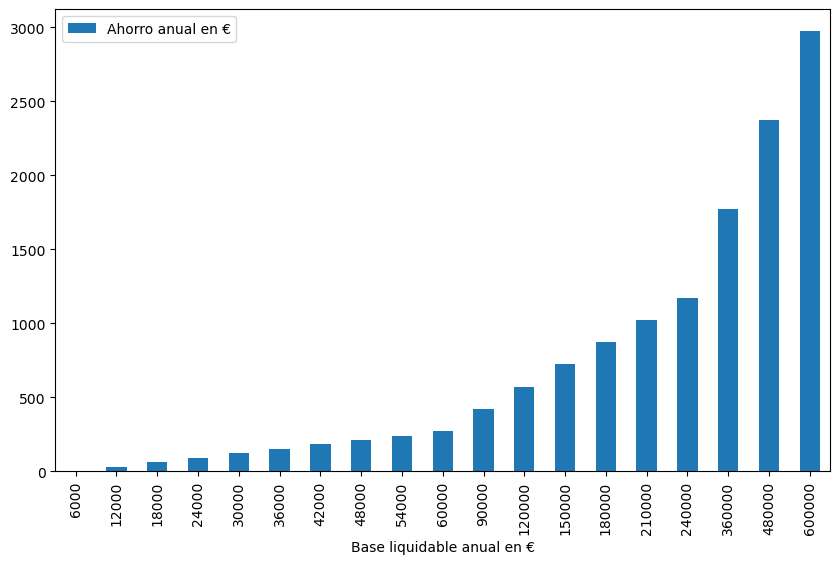

In [14]:
ahorro_anual[['Ahorro anual en €']].plot(kind='bar', figsize=(10, 6))
plt.savefig('ahorro_anual.png')
plt.show()


## Carga en MongoDB

In [1]:
%pip install pymongo
from pymongo import MongoClient

Note: you may need to restart the kernel to use updated packages.


In [47]:
MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

str_conn = 'mongodb://localhost:27017'   # str_con por defecto

cursor = MongoClient(str_conn)

cursor

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [49]:
db = cursor.dumping_mad

In [50]:
colec = db.n_colec

In [51]:
db.list_collection_names()

[]

In [56]:
ahorro_anual_dict = df.to_dict(orient='list')

In [58]:
colec.insert_one(ahorro_anual_dict)